In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import urllib.request
import zipfile

class GetDataSet():

    def __init__(self, dataset_link:str, dataset_path:str):
        self._dataset_link= dataset_link
        self._dataset_path = dataset_path


    def download_dataset(self):
        if not os.path.exists(self._dataset_path):
            print('Directory does not exist, New Directory has been Created')
            os.mkdir('Data')

        dataset_url = str(self._dataset_link)
        temp_dataset_path = os.path.join(self._dataset_path, 'dataset_archive.zip')
        print('Downloading Dataset .....')
    
        urllib.request.urlretrieve(dataset_url, temp_dataset_path)
        dataset_dir = os.path.join(self._dataset_path)
        print('Downloading Done')

        if not os.path.exists(dataset_dir):
            os.mkdir(dataset_dir)


    def extracting(self):
        temp_dataset_path = os.path.join(self._dataset_path, 'dataset_archive.zip')
        dataset_dir = os.path.join(self._dataset_path)
    
        with zipfile.ZipFile(temp_dataset_path, 'r') as zip_ref:
            zip_ref.extractall(dataset_dir)
            os.remove(temp_dataset_path)
            print('Extracting Done')

    def run(self):
        self.download_dataset()
        self.extracting()
        return 1

url = 'https://bit.ly/3GuMVI9' #www.kaggle.com/tongpython/cat-and-dog
folder_name = 'Data'
Get_Dataset= GetDataSet(url, folder_name)
Get_Dataset.run()

Directory does not exist, New Directory has been Created
Extracting Done


1

In [3]:
import os 
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy
from torch.utils.data import Dataset, DataLoader
import glob
from PIL import Image

global device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Device: {}'.format(device))

Device: cuda:0


In [4]:
'''

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 64


# define training and test data directories

train_dir = 'Data/training_set/'
test_dir = 'Data/test_set/'

#create transformers
image_size = (224, 224)
mean = [0.485, 0.456, 0.406]
std  = [0.229, 0.224, 0.225]
train_transform = transforms.Compose([
                                transforms.Resize(image_size), 
                                transforms.ToTensor(), 
                                transforms.Normalize(mean, std)])
test_transforms = transforms.Compose([
                                transforms.Resize(image_size), 
                                transforms.ToTensor(), 
                                transforms.Normalize(mean, std)])


 ## read data set using the custom class
train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transform)
dev_dataset = datasets.ImageFolder(root=test_dir, transform=test_transforms)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size, shuffle=True, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(dev_dataset, 1, shuffle=False)
'''
;

''

In [4]:
data_dir = 'Data'

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/training_set/training_set', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test_set/test_set', transform=test_transforms)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64)

In [5]:
from torchvision import datasets, transforms, models

model = models.densenet121(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


  0%|          | 0.00/30.8M [00:00<?, ?B/s]

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [6]:
# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False

from collections import OrderedDict
classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(1024, 512)),
                          ('relu1', nn.ReLU()),
                          ('fc2', nn.Linear(512,256)),
                          ('relu2', nn.ReLU()),
                          ('fc3', nn.Linear(256, 2)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))
    
model.classifier = classifier

In [7]:
import time

In [8]:
# Try to replace with just ['cuda'] if you are using GPU 

for device in ['cpu', 'cuda']:

    criterion = nn.NLLLoss()
    # Only train the classifier parameters, feature parameters are frozen
    optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

    model.to(device)

    for ii, (inputs, labels) in enumerate(train_loader):

        # Move input and label tensors to the GPU
        inputs, labels = inputs.to(device), labels.to(device)

        start = time.time()

        outputs = model.forward(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if ii==3:
            break
        
    print(f"Device = {device}; Time per batch: {(time.time() - start)/3:.3f} seconds")

Device = cpu; Time per batch: 3.588 seconds
Device = cuda; Time per batch: 0.013 seconds


In [9]:
from torchvision import datasets, transforms, models

model = models.densenet121(pretrained=True)
print(model)


for param in model.parameters():
    param.requires_grad = False
    
model.classifier = nn.Sequential(nn.Linear(1024, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(512, 256),
                                 nn.ReLU(),
                                 nn.Dropout(0.1),
                                 nn.Linear(256, 2),
                                 nn.LogSoftmax(dim=1))

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [10]:
model.to(device)
criterion = nn.NLLLoss()

# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.classifier.parameters(), lr=0.003)


traininglosses = []
testinglosses = []
testaccuracy = []
totalsteps = []
epochs = 10
steps = 0
running_loss = 0
print_every = 5
for epoch in range(epochs):
    for inputs, labels in train_loader:
        steps += 1
        # Move input and label tensors to the default device
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in test_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    
                    test_loss += batch_loss.item()
                    
                    # Calculate accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
            
            traininglosses.append(running_loss/print_every)
            testinglosses.append(test_loss/len(test_loader))
            testaccuracy.append(accuracy/len(test_loader))
            totalsteps.append(steps)
            print(f"Device {device}.."
                  f"Epoch {epoch+1}/{epochs}.. "
                  f"Step {steps}.. "
                  f"Train loss: {running_loss/print_every:.5f}.. "
                  f"Test loss: {test_loss/len(test_loader):.5f}.. "
                  f"Test accuracy: {accuracy/len(test_loader):.5f}")
            running_loss = 0
            model.train()


Device cuda..Epoch 1/10.. Step 5.. Train loss: 0.98301.. Test loss: 0.59340.. Test accuracy: 0.50781
Device cuda..Epoch 1/10.. Step 10.. Train loss: 0.53135.. Test loss: 0.25637.. Test accuracy: 0.97918
Device cuda..Epoch 1/10.. Step 15.. Train loss: 0.24253.. Test loss: 0.05974.. Test accuracy: 0.98486
Device cuda..Epoch 1/10.. Step 20.. Train loss: 0.38252.. Test loss: 0.04610.. Test accuracy: 0.98682
Device cuda..Epoch 1/10.. Step 25.. Train loss: 0.40235.. Test loss: 0.05686.. Test accuracy: 0.98047
Device cuda..Epoch 1/10.. Step 30.. Train loss: 0.24566.. Test loss: 0.05211.. Test accuracy: 0.98633
Device cuda..Epoch 1/10.. Step 35.. Train loss: 0.20082.. Test loss: 0.05933.. Test accuracy: 0.98633
Device cuda..Epoch 1/10.. Step 40.. Train loss: 0.20957.. Test loss: 0.08614.. Test accuracy: 0.97803
Device cuda..Epoch 1/10.. Step 45.. Train loss: 0.19801.. Test loss: 0.06023.. Test accuracy: 0.98779
Device cuda..Epoch 1/10.. Step 50.. Train loss: 0.18830.. Test loss: 0.06356.. Test

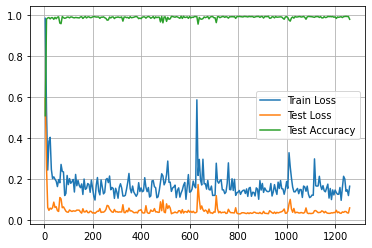

In [11]:
from matplotlib import pyplot as plt
plt.plot(totalsteps, traininglosses, label='Train Loss')
plt.plot(totalsteps, testinglosses, label='Test Loss')
plt.plot(totalsteps, testaccuracy, label='Test Accuracy')
plt.legend()
plt.grid()
plt.savefig('Model_new.png')


torch.save(model.state_dict(), '/content/gdrive/MyDrive/dogcatwights_new.pth')



checkpoint = {
    'parameters' : model.parameters,
    'state_dict' : model.state_dict()
}




torch.save(checkpoint, '/content/gdrive/MyDrive/catvdog.pth')